# Atividade 01: Desenvolvimento de um Classificador Binário por Limiar
### Aluno: Alisson da Silva Vieira

# Bibliotecas utilizadas
- Numpy: É uma biblioteca fundamental para computação científica em Python, que fornece um objeto de matriz multidimensional, vários objetos derivados (como matrizes e matrizes mascaradas) e uma variedade de rotinas para operações rápidas em matrizes.
- Pandas: É uma biblioteca que fornece estruturas de dados rápidas, flexíveis e expressivas projetadas para tornar o trabalho com dados "relacionais" ou "rotulados" fácil e intuitivo. Tem como objetivo ser o bloco de construção fundamental de alto nível para fazer análises de dados.
- Matplotlib: É uma biblioteca abrangente para a criação de visualizações estáticas, animadas e interativas em Python. Produz figuras com qualidade de publicação em uma variedade de formatos impressos e ambientes interativos em várias plataformas. Matplotlib pode ser usado em scripts Python, o shell Python e IPython, servidores de aplicativos da web e vários kits de ferramentas de interface gráfica do usuário.
- Seaborn: É uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
- Scikit-learn: É uma biblioteca em Python para aprendizado de máquina desenvolvido com base no SciPy que fornece um conjunto de ferramentas de machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

# Abertura do arquivo
Além de abrir o arquivo, conseguimos observar os 5 primeiros valores da base de dados.

In [2]:
df = pd.read_csv('data/iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


# Estatísticas descritivas 
As estatísticas são dadas ao agrupar os dados por espécies. 

In [15]:
df.groupby('especie').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
especie                             ...                          
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

# Histograma para cada atributo
É realizado um histograma para os atributos: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Em uma primeira análise, tendo em vista os histogramas, podemos perceber que os atributos sepal lenght e sepal width são muito semelhantes entre si, o contrário dos atributos petal lenght e petal widht, que em comparação, possuem mais valores que diferem entre si.

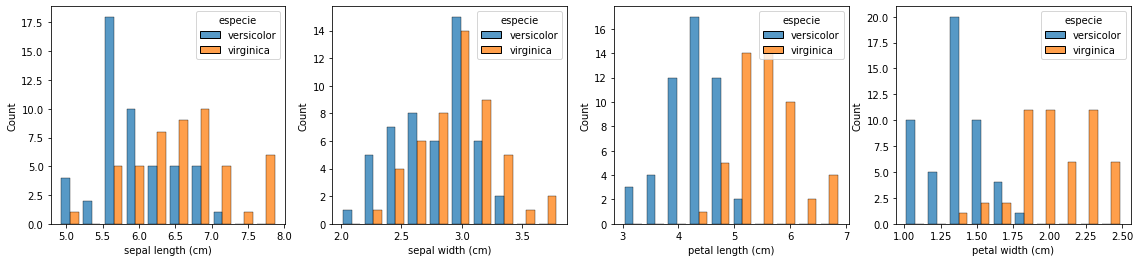

In [16]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(8,4))

for i, column in enumerate(columns):
    sns.histplot(data=df, bins=10, x=column, hue='especie', multiple='dodge', shrink=0.8, ax=axes[i])

plt.subplots_adjust(right=2.0, wspace=0.2)
plt.show()

# Scatterplots com os atributos
É realizado um scatteplots com os seguintes pares de atributos:
- sepal length (cm) e sepal width (cm)
- petal length (cm) e petal width (cm)

Como vemos no segundo scatterplot, os atributos petal lenght e petal width são os que inicialmente parecem serem os mais promissores.

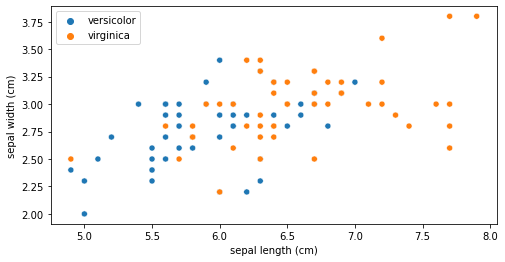

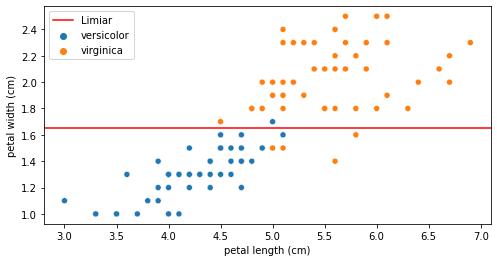

In [17]:
columns = [['sepal length (cm)', 'sepal width (cm)', 0], ['petal length (cm)', 'petal width (cm)', 1.65]]

for column in columns:
    plt.figure(figsize=(8,4))
    sns.scatterplot(data=df, x=column[0], y=column[1], hue='especie')
    
    if column[2] != 0: plt.axhline(column[2], color='red', label='Limiar')
    
    plt.legend()
    plt.show()

# Análise
Pelas nossas análises, percebemos que os atributos petal lenght e petal widht são os mais promissores para separar as espécies.

# Declaração de funções que serão utilizadas

In [18]:
''' Metodo de classificacao por limiar 

Esse metodo realiza a classificacao de acordo com o limiar definido.
Params: 
    limiar (o proprio limiar definido)
    dados (os dados que serão utilizados)
    rotulos (os rotulos para cada classe)
'''

def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []

    for _, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])

    return pd.DataFrame(resposta, columns=['especie'])

''' Metodo acuracia 

Esse metodo realiza o calculo da acuracia.
Params: 
    acertos (quantidade de acertos do classificador)
    total_instancias (quantidade total de instancias)
'''
def acuracia(acertos, total_instancias):
    return acertos / total_instancias

''' Metodo da busca exaustiva

Esse metodo realiza a busca exaustiva para encontrar o melhor limiar.
Params: 
    n_limiares (quantidade de limiares a serem testados)
    atributos (os dados)
    rotulos (os rotulos dos dados)
    alt_min (limiar minimo)
    alt_max (limiar maximo)
'''
def busca_exaustiva(n_limiares, atributos, rotulos, alt_min, alt_max):
    limiares = np.linspace(alt_min, alt_max, n_limiares)
    
    melhor_limiar = 0
    melhor_acuracia = 0
    pior_limiar = 0
    menor_acuracia = 1
    acuracias = []

    for limiar in limiares[0:]:
        predicoes = classificador_limiar(limiar, atributos)
        acuracia = accuracy_score(rotulos, predicoes['especie'])
        acuracias.append(acuracia)

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar

        if acuracia < menor_acuracia:
            menor_acuracia = acuracia
            pior_limiar = limiar
            
    return melhor_limiar, melhor_acuracia, menor_acuracia, pior_limiar, acuracias, limiares

# separando os dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'],\
    test_size=0.2, stratify=df['especie'].tolist(), shuffle=True, random_state=10)

# Execução da busca exaustiva procurando maximizar a acurácia
Foram obtidos os seguintes resultados:
- 

Melhor limiar: 1.600   |   Melhor Acurácia: 0.938
Pior limiar: 2.400     |   Pior Acurácia: 0.525
Acurácia média: 0.762  |   Desvio padrão: 0.127


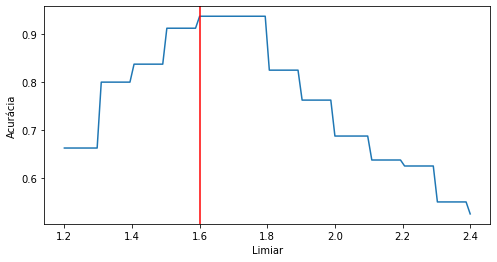

In [19]:
melhor_limiar, melhor_acuracia, menor_acuracia, pior_limiar, acuracias, limiares = busca_exaustiva(100, x_treino, y_treino, 1.2, 2.4)
print("Melhor limiar: %.3f   |   Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))
print("Pior limiar: %.3f     |   Pior Acurácia: %.3f" % (pior_limiar, menor_acuracia))
print("Acurácia média: %.3f  |   Desvio padrão: %.3f" % (np.mean(acuracias), np.std(acuracias)))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

# Execução da busca exaustiva com 20 particionamentos diferentes
Foram obtidos os seguintes resultados:
- Melhor acurácia: 1.000 
- Pior acurácia: 0.850
- Acurácia média: 0.955
- Desvio padrão: 0.038

In [20]:
acuracias = []
melhor_acuracia = 0
pior_acuracia = 1

for i in range(20):
    x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'],\
    test_size=0.2, stratify=df['especie'].tolist(), shuffle=True, random_state=i)

    limiar = busca_exaustiva(100, x_treino, y_treino, 1.5, 2.0)[0]

    predicoes = classificador_limiar(limiar, x_teste)
    acc = accuracy_score(y_teste, predicoes)
    acuracias.append(acc)

    if acc > melhor_acuracia:
        melhor_acuracia = acc

    if acc < pior_acuracia:
        pior_acuracia = acc
        

print('Melhor Acurácia: %.3f   |   Pior Acurácia: %.3f' % (melhor_acuracia, pior_acuracia),\
    '\nAcurácia média: %.3f    |   Desvio padrão: %.3f' % (np.mean(acuracias), np.std(acuracias)))

Melhor Acurácia: 1.000   |   Pior Acurácia: 0.850 
Acurácia média: 0.947    |   Desvio padrão: 0.033
